## Fraud Detection

#### Importing necessary libraries

In [1]:
import os
import sys

import joblib
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import shap
import lime.lime_tabular
from interpret.blackbox import LimeTabular
from interpret import show

shap.initjs() 

In [33]:
sys.path.append(os.path.abspath('../scripts'))

from Utils import DataUtils
from Model_utils import ModelUtils
from Plotting import Plots

utils = DataUtils()
model_utils = ModelUtils()
plotting = Plots()

#### Loading data

In [3]:
fraud_data = utils.load_data('Clean_FraudData.csv')
creditCard_data = utils.load_data('Clean_creditCard_data.csv')

2024-10-27 01:30 - DEBUG :: Loading data from file...
2024-10-27 01:30 - INFO :: Loading Clean_FraudData.csv took 4.55 seconds


2024-10-27 01:30 - DEBUG :: Loading data from file...
2024-10-27 01:30 - INFO :: Loading Clean_creditCard_data.csv took 1.66 seconds




#### Preparing before training

In [4]:
X_train_fraud, X_val_fraud, y_train_fraud, y_val_fraud = model_utils.split_data(fraud_data)
X_train_creditCard, X_val_creditCard, y_train_creditCard, y_val_creditCard = model_utils.split_data(creditCard_data)

2024-10-27 01:30 - INFO :: Splitting Fraud data...
2024-10-27 01:30 - INFO :: Splitting credit card data...


#### Model interpretability for creditcard dataset using SHAP and LIME

In [5]:
tree_model = joblib.load('../mlartifacts/920733067663693261/cb0812fb4fb745d38e7190ece9bd8ccd/artifacts/Fraud_Dtree_path/model.pkl')
forest_model = joblib.load('../mlartifacts/920733067663693261/36a2fe1c75264298986dba6fe3c83419/artifacts/Fraud_RF_path/model.pkl')
lr_model = joblib.load('../mlartifacts/920733067663693261/ec395cab41cc4863b5ee5c7adb2fd402/artifacts/Fraud_LR_path/model.pkl')

In [8]:
lime = LimeTabular(forest_model, X_train_creditCard, random_state=42)
show(lime.explain_local(X_val_creditCard[:5], y_train_creditCard[:5]), 0)

<!-- http://127.0.0.1:7001/1549191826800/ -->

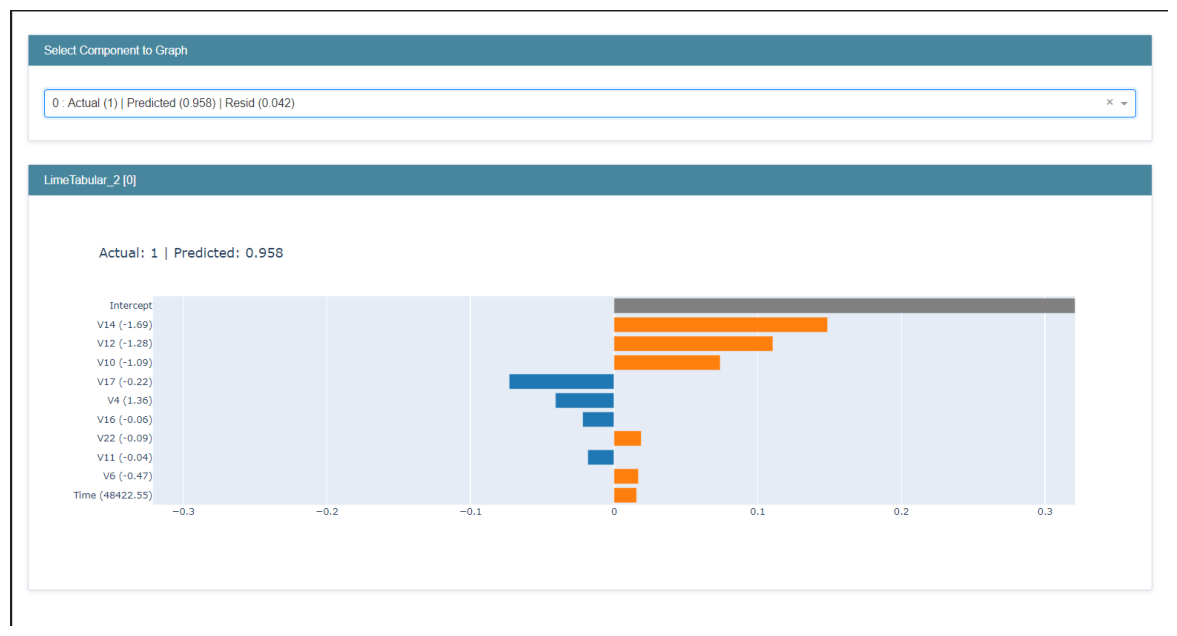

In [23]:
path = '../report/Fraud_RF_Model-creditcard dataset.png'
plotting.show_image(path)

In [7]:
lime = LimeTabular(tree_model, X_train_creditCard, random_state=42)
show(lime.explain_local(X_val_creditCard[:5], y_train_creditCard[:5]), 0)

<!-- http://127.0.0.1:7001/1549154964336/ -->

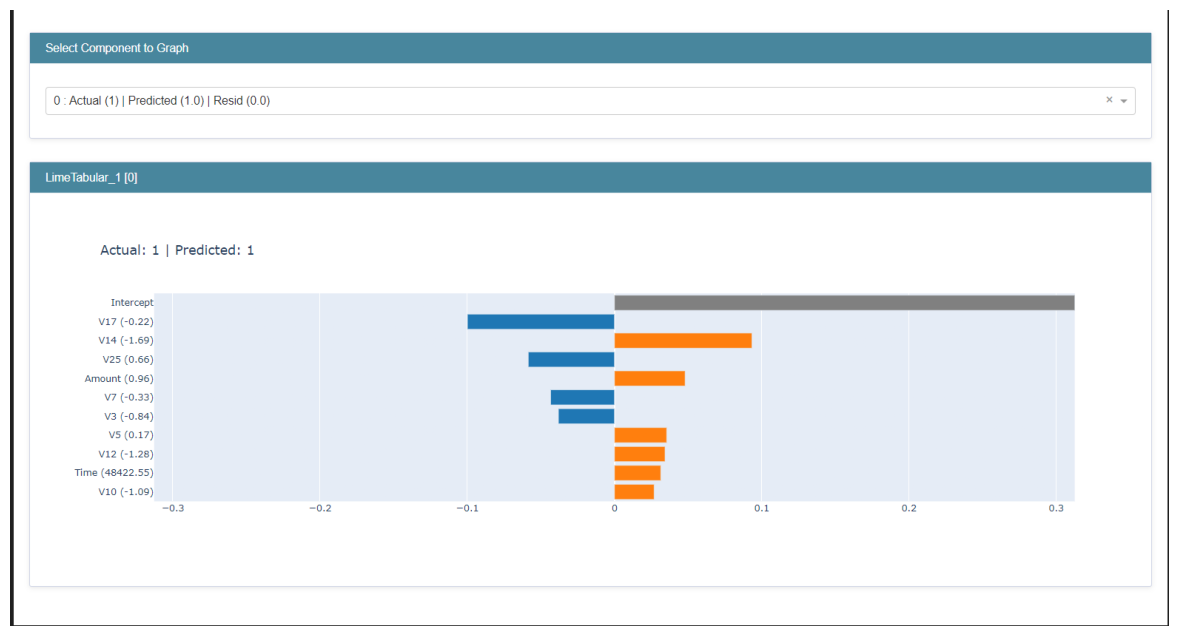

In [25]:
path = '../report/Fraud_tree_Model-creditcard dataset.png'
plotting.show_image(path)

PermutationExplainer explainer: 113303it [38:07, 49.27it/s]                             


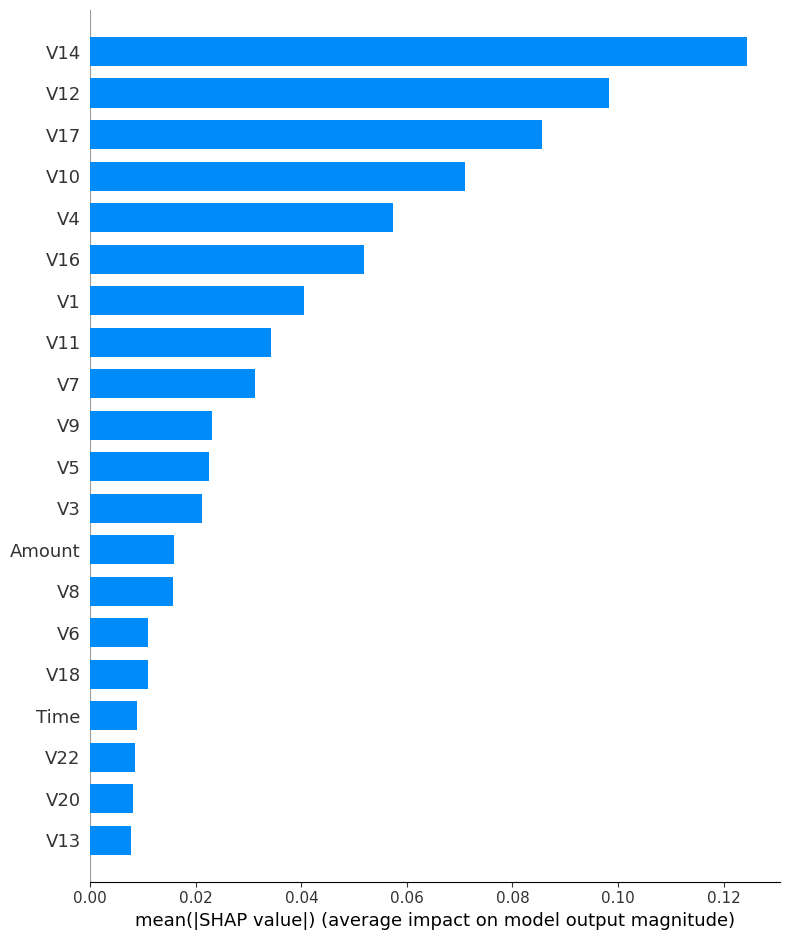

In [ ]:
explainer = shap.Explainer(lr_model.predict, X_val_creditCard)
shap_values = explainer.shap_values(X_val_creditCard)
shap.summary_plot(shap_values, X_val_creditCard, plot_type="bar")

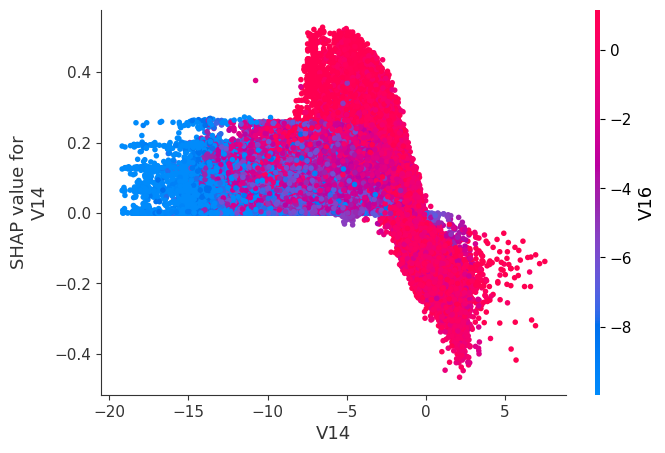

In [ ]:
shap.dependence_plot("V14", shap_values, X_val_creditCard)

In [ ]:
explainer = shap.LinearExplainer(lr_model, X_val_creditCard)
explanation = explainer(X_val_creditCard)
shap.plots.force(explanation[0])

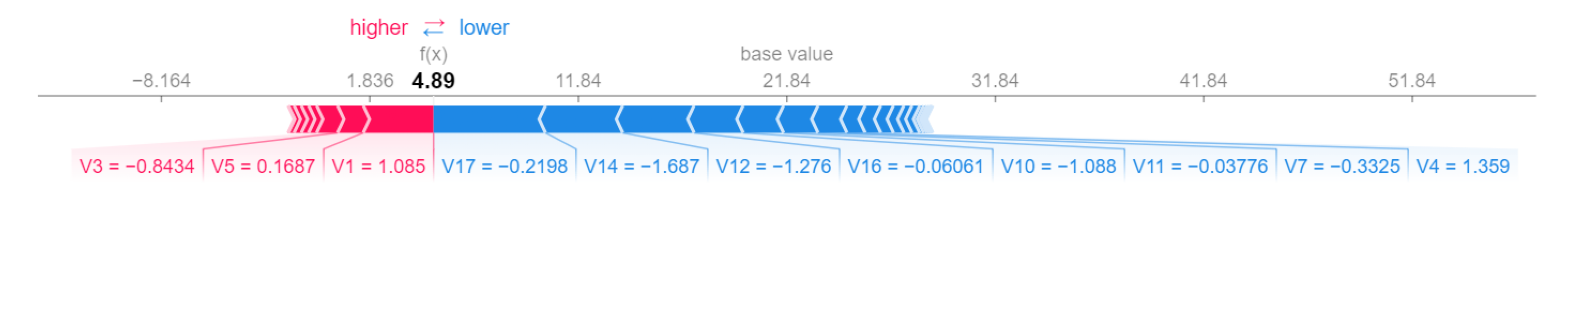

In [26]:
path = '../report/Force_plot-creditcard datset.png'
plotting.show_image(path)

#### Model interpretability for ecommerce fraud dataset

In [19]:
lr_model_ecommerce = joblib.load('../mlartifacts/891150804028438362/4ddca66f905b430880f8481325124867/artifacts/Fraud_LR_path/model.pkl')
RF_model_ecommerce = joblib.load('../mlartifacts/891150804028438362/6394144cb4b54e858375ecacec0d1094/artifacts/Fraud_RF_path/model.pkl')

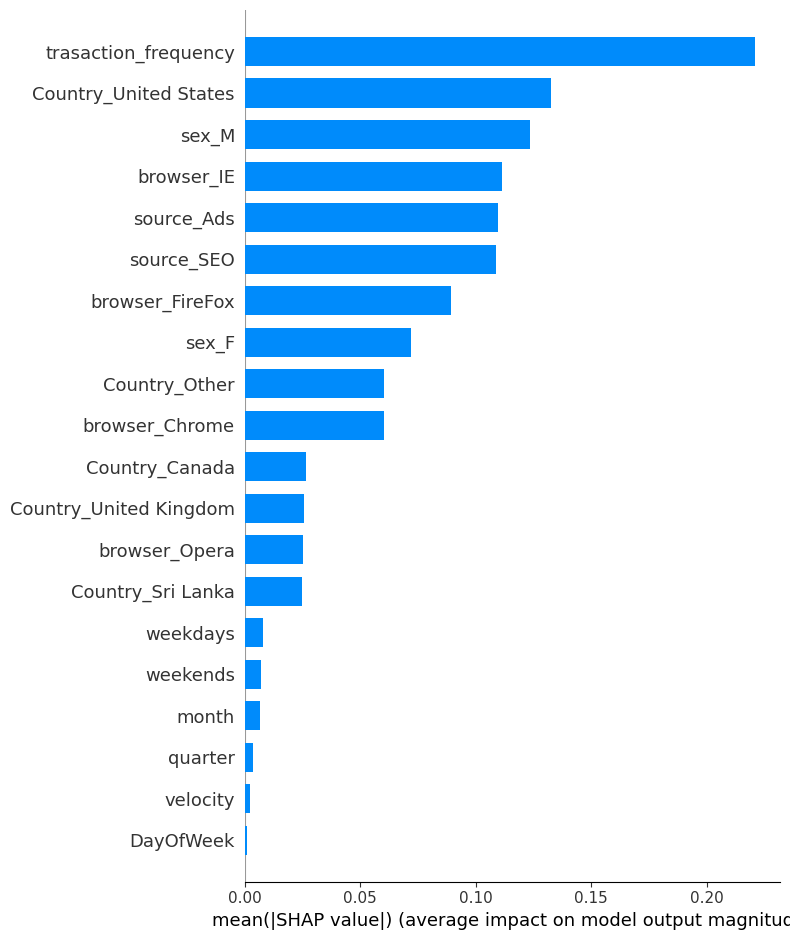

In [10]:
explainer = shap.Explainer(lr_model_ecommerce.predict, X_val_fraud[:10])
shap_values = explainer.shap_values(X_val_fraud[:10])
shap.summary_plot(shap_values, X_val_fraud[:10], plot_type="bar")

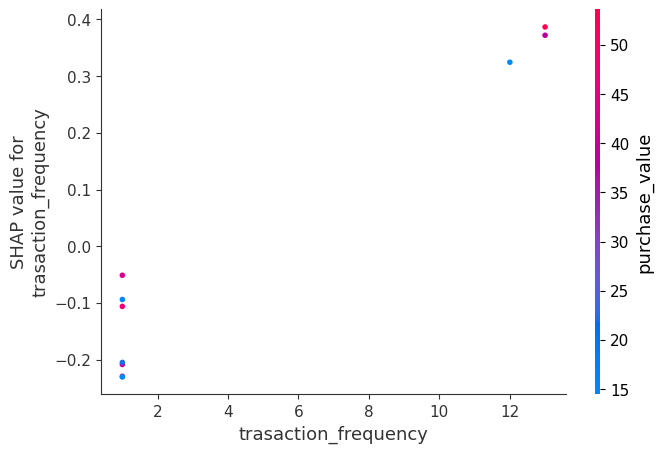

In [32]:
shap.dependence_plot("trasaction_frequency", shap_values, X_val_fraud[:10])

In [18]:
explainer = shap.LinearExplainer(lr_model_ecommerce, X_val_fraud)
explanation = explainer(X_val_fraud)
shap.plots.force(explanation[0])

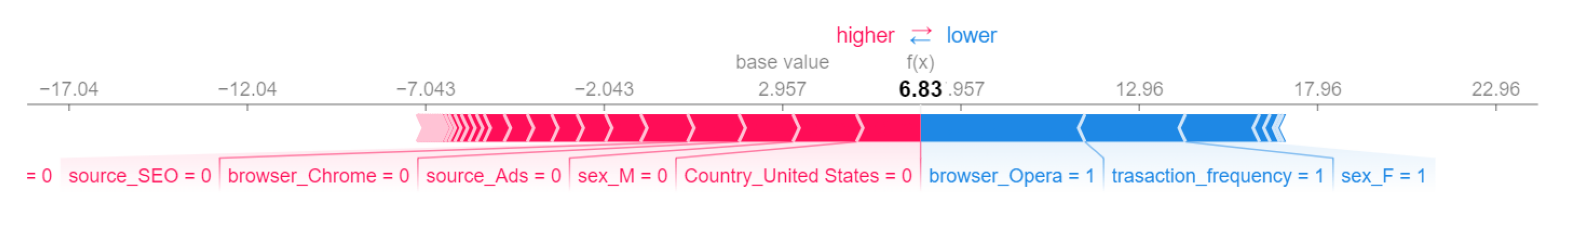

In [28]:
path = '../report/Force_plot-ecommerce dataset.png'
plotting.show_image(path)

In [20]:
lime = LimeTabular(RF_model_ecommerce, X_train_fraud, random_state=42)
show(lime.explain_local(X_val_fraud[:5], y_train_fraud[:5]), 0)

<!-- http://127.0.0.1:7001/1549505792144/ -->

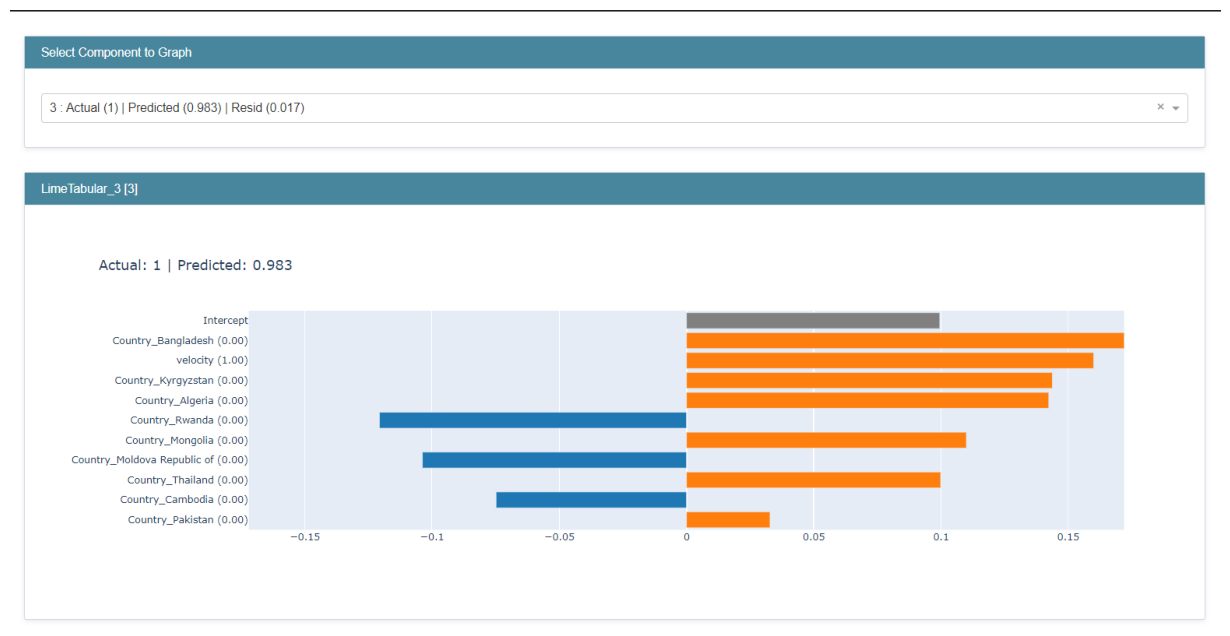

In [29]:
path = '../report/Fraud_RF_Model-ecommerce dataset.png'
plotting.show_image(path)